In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [19]:
df = pd.read_csv("C:/program1/class/winequality-red.csv")  
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 'class' 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['quality'] = label.fit_transform(df['quality'])

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


Text(0.5, 1.0, 'Wine')

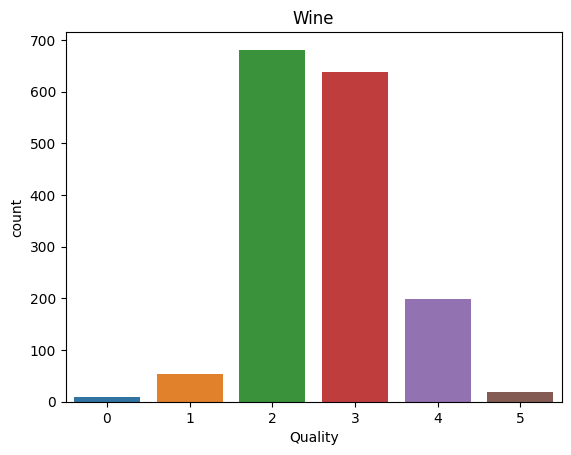

In [22]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="quality")
plt.xlabel("Quality")
plt.title("Wine")

In [23]:
# 레이블 갯수 확인 (숫자)
df['quality'].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [24]:
# 결측치 확인
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
X=df.drop(['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'quality'], axis=1)
# class 컬럼 삭제하여 X에 저장, axis=1 이면 y축 기준
X.head()
# head()는 첫 5행만 출력함.

,fixed acidity,citric acid,density,sulphates,alcohol
0,7.4,0.00,0.9978,0.56,9.4
1,7.8,0.00,0.9968,0.68,9.8
2,7.8,0.04,0.9970,0.65,9.8
3,11.2,0.56,0.9980,0.58,9.8
4,7.4,0.00,0.9978,0.56,9.4


In [27]:
y=df['quality']
y.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,fixed acidity,citric acid,density,sulphates,alcohol
642,9.9,0.45,0.99910,0.62,9.4
679,10.8,0.45,0.99720,0.54,9.6
473,9.9,0.55,0.99710,0.79,10.6
390,5.6,0.05,0.99240,0.82,12.9
1096,6.6,0.09,0.99655,0.49,10.8
...,...,...,...,...,...
763,9.3,0.26,0.99738,0.42,9.6
835,7.6,0.10,0.99655,0.51,9.3
1216,7.9,0.31,0.99677,0.69,9.5
559,13.0,0.49,1.00210,0.68,12.7


In [29]:
X_train.columns

Index(['fixed acidity', 'citric acid', 'density', 'sulphates', 'alcohol'], dtype='object')

In [30]:
#X_train의 특성 개수
X_train.shape[1]

5

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [32]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.60625
[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 110  25   0   0]
 [  0   0  58  84   0   0]
 [  0   0   1  26   0   0]
 [  0   0   0   3   0   0]]


In [33]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test) 
#예측한 값을 pred_lr에 저장

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
#예측한 값과 실제 값을 비교
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.621875
[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 108  25   2   0]
 [  0   0  51  84   7   0]
 [  0   0   1  19   7   0]
 [  0   0   1   0   2   0]]


C:\Users\User\.anaconda\envs\deep\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [34]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.625
[[ 0  0  2  0  0  0]
 [ 0  1  4  6  0  0]
 [ 0  5 88 38  4  0]
 [ 0  0 32 94 15  1]
 [ 0  3  0  6 16  2]
 [ 0  0  0  1  1  1]]
